----
**Carga de librerías**

In [ ]:
# Convertir todo a mayúsculas y eliminar espacios al principio y al final
data_sucia['Motivo de la RENUNCIA'] = data_sucia['Motivo de la RENUNCIA'].str.upper().str.strip()

# Unificar categorías que son esencialmente las mismas
reemplazos_motivos = {
    'IMP.TRA-LFT Y/O REGLAMENTO INT.': 'IMP.TRA-LFT Y/O REGLAMENTO INTERNO',
    'IMP.TRA-LFT Y/O REGLAMENTO INT': 'IMP.TRA-LFT Y/O REGLAMENTO INTERNO',
    'IMP.PAT-TERMINACIÓN DEL CONTRATO': 'IMP.PAT-TERMINACIÓN DEL CONTRATO',
    'IMP.PAT-TERMINACIÓN DEL CONTRA': 'IMP.PAT-TERMINACIÓN DEL CONTRATO',
    'IMP.TRA-FALSIFICACIÓN DE DOCTOS.': 'IMP.TRA-FALSIFICACIÓN DE DOCUMENTOS',
    'IMP.TRA-FALSIFICACIÓN DE DOCTO': 'IMP.TRA-FALSIFICACIÓN DE DOCUMENTOS'
    # Agrega aquí cualquier otro reemplazo necesario
}

# Utilizar .loc para asegurar que estamos modificando el DataFrame original
data_sucia.loc[:, 'Motivo de la RENUNCIA'] = data_sucia['Motivo de la RENUNCIA'].replace(reemplazos_motivos)

# Contar de nuevo los valores
data_sucia['Motivo de la RENUNCIA'].value_counts()


In [ ]:
data_sucia["CODIGO POSTAL"].info()

In [ ]:
data_sucia["CODIGO POSTAL"].unique()

In [ ]:
data_sucia[data_sucia["CODIGO POSTAL"] == 3720] # Corresponde 

In [ ]:
data_sucia[data_sucia["CODIGO POSTAL"] == 3259] # Corresponde 

In [ ]:
data_sucia.info()



In [ ]:
# Importar libreria para trabajar con mysql
#! pip install mysql-connector-python
import mysql.connector



# Hacer un mapeo de los datos necesarios para conectarse
config = {
    'user': 'datathonequipo5',
    'password': 'CodedSpiritDev05',
    'host': 'datathon.mysql.database.azure.com',
    'database': 'datathon'
}

# Conectarse a la base de datos
cnx = mysql.connector.connect(**config)

# Verificar la conexión
cnx.is_connected()



In [ ]:
total_time = time.time() - start_time
print(f"Tiempo total de ejecución: {total_time} segundos")
data_sucia

In [35]:
import time
start_time = time.time()

In [36]:
import numpy as np

import matplotlib.pyplot as plt
import sklearn
%load_ext cudf.pandas
# pandas API is now GPU accelerated

import pandas as pd

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


In [37]:
#Cargamos los datos
! pip install openpyxl
data = pd.read_excel('data/bosch_aic_datathon.xlsx')

In [38]:
# Exploramos los tipos de datos
type(data)

pandas.core.frame.DataFrame

In [39]:
#hacemos una copia de los datos
data_sucia=data

In [40]:
#Previsualizamos los datos
data_sucia.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


In [41]:
data_sucia.shape

(1403, 20)

In [42]:
data_sucia.info()
#Podemos ver que la mayoría de los datos son objetos 
#hay unos que son enteros, por lo que unos si será necesario cambiarlos 
#La columna de alta y baja son fechas de tiempo ese si corresponde

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Posición                                      1403 non-null   object        
 1   Area                                          1403 non-null   object        
 2   Á.liq.                                        1403 non-null   object        
 3   Grupo de personal                             1403 non-null   object        
 4   CODIGO POSTAL                                 1403 non-null   int64         
 5   Motivo de la RENUNCIA                         1403 non-null   object        
 6   Banda                                         1402 non-null   object        
 7   Baja                                          1403 non-null   datetime64[ns]
 8   ReglaPHT                                      1403 non-null   object

In [43]:
"""# Crear un diccionario que mapee los nombres de las columnas a 'category'
columnas_a_categorizar = [
    'Posición', 'Estado Civil', 'Lugar de nacimiento', 
    'Clave de sexo', 'Motivo de la RENUNCIA', 'Banda', 
    'CODIGO POSTAL', 'Grupo de personal'
]

tipo_columnas = {columna: 'category' for columna in columnas_a_categorizar}

# Aplicar 'categorical' a las columnas especificadas en data_sucia
data_sucia = data_sucia.astype(tipo_columnas)

# Ver actualizado
data_sucia.info()"""

"# Crear un diccionario que mapee los nombres de las columnas a 'category'\ncolumnas_a_categorizar = [\n    'Posición', 'Estado Civil', 'Lugar de nacimiento', \n    'Clave de sexo', 'Motivo de la RENUNCIA', 'Banda', \n    'CODIGO POSTAL', 'Grupo de personal'\n]\n\ntipo_columnas = {columna: 'category' for columna in columnas_a_categorizar}\n\n# Aplicar 'categorical' a las columnas especificadas en data_sucia\ndata_sucia = data_sucia.astype(tipo_columnas)\n\n# Ver actualizado\ndata_sucia.info()"

In [44]:
data_sucia.describe()

,CODIGO POSTAL,Años,Meses,Antigüedad,Edad del empleado,Hijos
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,32550.890948,4.192445,48.848373,1465.451176,30.941554,1.132573
std,1740.667827,4.650099,54.076010,1622.280304,9.734537,1.302182
min,3259.000000,0.000000,0.166667,5.000000,18.000000,0.000000
25%,32575.000000,1.000000,5.766667,173.000000,24.000000,0.000000
50%,32575.000000,3.000000,32.600000,978.000000,28.000000,1.000000
75%,32599.000000,6.000000,71.100000,2133.000000,36.000000,2.000000
max,75116.000000,29.000000,351.733333,10552.000000,67.000000,6.000000


In [45]:
data_sucia.columns

StringIndex(['Posición' 'Area' 'Á.liq.' 'Grupo de personal' 'CODIGO POSTAL'
 'Motivo de la RENUNCIA' 'Banda' 'Baja' 'ReglaPHT' 'Alta' 'Años' 'Meses'
 'Antigüedad' 'Clave de sexo' 'Lugar de nacimiento' 'Nacionalidad'
 'Edad del empleado' '¿Cuanto tiempo tiene viviendo en Cd. Juarez?'
 'Estado Civil' 'Hijos'], dtype='object')

In [46]:
columns = [
    'Posición', 'Area', 'Á.liq.', 'Grupo de personal', 'CODIGO POSTAL',
    'Motivo de la RENUNCIA', 'Banda', 'Baja', 'ReglaPHT', 'Alta',
    'Años', 'Meses', 'Antigüedad', 'Clave de sexo', 'Lugar de nacimiento',
    'Nacionalidad', 'Edad del empleado', '¿Cuanto tiempo tiene viviendo en Cd. Juarez?',
    'Estado Civil', 'Hijos'
]

for column in columns:
    print(column, data_sucia[column].isna().sum())

# Dejando de lado la columna de vivir en juarez, tenemos un total de 13 NA's
# Podemos eliminar las filas de la columna de BANDA y la de LUGAR DE NACIMIENTO
# La columna de ESTADO CIVIL la podemos cambiar a soltero
# En cambio, la columna de juarez podemos cambiar todos esos NA's por "no he vivido en CD.JUAREZ"

Posición 0
Area 0
Á.liq. 0
Grupo de personal 0
CODIGO POSTAL 0
Motivo de la RENUNCIA 0
Banda 1
Baja 0
ReglaPHT 0
Alta 0
Años 0
Meses 0
Antigüedad 0
Clave de sexo 0
Lugar de nacimiento 2
Nacionalidad 0
Edad del empleado 0
¿Cuanto tiempo tiene viviendo en Cd. Juarez? 786
Estado Civil 10
Hijos 0


# One-hot para Clave de sexo

In [47]:
# Usamos One-hot Encoding para la columna de estado civil

# Agrupación para la columna de cuanto tiempo viviendo en Cd. Juarez

<Axes: ylabel='¿Cuanto tiempo tiene viviendo en Cd. Juarez?'>

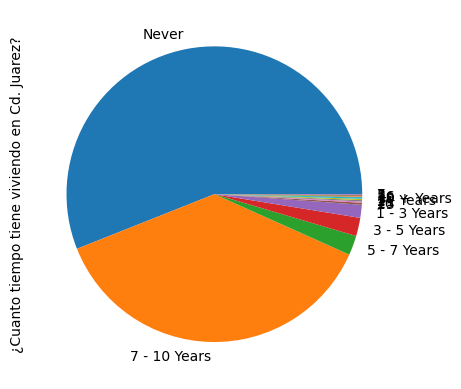

In [48]:
# Esta tecnica tambien se puede usar para la columna de cuantos años has vivido en juarez, pero primero
# hay que cambiar los NA's por 0, porque si es NA's es porque no ha vivido en Juarez
# Primero cambiamos los NA's por 0
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].fillna('Never', inplace=True)

# Para poder limpiar lo de los años voy a agruparlos en una cantidad fija, ya que hay valores como 2 y esa clase de valores
# puede ir contenidos en 1-3, esto se ve en la celda anterior
# Definir la función para categorizar los años
def categorize_years(value):
    if value in ['91-180 Days', '61-90 Days']:
        return '1 - Years'
    elif value in ['1-2 Years', '2-3 Years', '1-2 Years ']:
        return '1 - 3 Years'
    elif value in ['3-4 Years', '4-5 Years', '4', '5']:
        return '3 - 5 Years'
    elif value in ['5-6 Years', '6-7 Years', '6 Years', '7']:
        return '5 - 7 Years'
    elif value in ['7-8 Years', '8-9 Years', '9-10 Years', '10 years', '10+ Years', '10']:
        return '7 - 10 Years'
    elif value in ['26 years', '25 years', '21', '19', '16', '25']:
        return '10 + Years'
    else: 
        return value

# Aplicar la función de categorización
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'] = data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].apply(categorize_years)
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'] = data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].apply(categorize_years)

# Hacer plot de la columna de años
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].value_counts().plot(kind='pie')


# Quitams los '-' y '/' de Motivo de la RENUNCIA

In [49]:
data_sucia['Motivo de la RENUNCIA'].replace(to_replace='[-/]', value=' ', regex=True)

0                       Vol Otro empleo
1                       Vol Otro empleo
2                       Vol Otro empleo
3                          Vol Estudios
4               Vol Cambio de domicilio
                     ...               
1398     Vol Transferencia entre planta
1399            Vol Cambio de domicilio
1400      Vol No regreso   no dio razón
1401      Imp.Tra Ausentismos continuos
1402    Imp.Tra LFT y o Reglamento Int.
Name: Motivo de la RENUNCIA, Length: 1403, dtype: object

# Limpieza de Columna de Estado Civil

In [50]:
#Ahora tenemos que cambiar el los NA's de estado civil por soltero, esto no se si sea lo correcto, pero
#a lo mejor le da pena decir que es soltero no se 
data_sucia['Estado Civil'].fillna('solter', inplace=True)
data_sucia['Estado Civil'].unique()


def categorize_civil(value):
    if value in ['solter','Solter','viud.']:
        return 'Solter'
    elif value in ['casad.','Casad.','Concu.','U.Libr']:
        return 'Casad'
    elif value in ['Divorc','Sep.','divorc']:
        return 'Separ'
    else:
        return value

data_sucia['Estado Civil'] = data_sucia['Estado Civil'].apply(categorize_civil)

# Limpieza de la columna de Lugar de Nacimiento

In [51]:
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Diccionario de reemplazos
reemplazos = {
    'Chihuahua': ['AZTECA CIUDAD JUAREZ', 'CAMARGO', 'CD JUAREZ', 'CD JUAREZ CHIH', 'CD. JUAREZ'],
    'Durango': ['CD. GOMEZ PALACIO', 'GENERAL SIMON BOLIVAR', 'GOMEZ PALACIO', 'LERDO', 'DURANGO', 'PEÑON BLANCO', 'POBLADO EL LUCERO', 'SAN DIMAS', 'TLAHUALILO DE ZARAGOZA'],
    'Aguascalientes': ['AGUASCALIENTES'],
    'Sinaloa': ['AHOME', 'CULIACAN'],
    'Veracruz': ['ANGEL R CABADA', 'COATZACOALCOS', 'CORDOBA', 'CORDOVA', 'COSAMALOAPAN', 'LAS MERCEDES', 'MARTINEZ DE LA TORRE', 'MINATITLAN', 'MOLOACAN', 'RAYA CARACOL', 'SAN ANDRES TUXTLA', 'TRES VALLES', 'VERACRUZ'],
    # Agrega el resto de tus reemplazos aquí
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos = {ciudad: estado for estado, ciudades in reemplazos.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(reemplazos_invertidos)

# Ver resultados de los reemplazos usando aleatoriedad
data_sucia['Lugar de nacimiento'].sample(10)

224        COMALCALCO
121         CHIHUAHUA
1311           JUAREZ
194      PARRAL, CHIH
450     CIUDAD JUAREZ
1051           JUAREZ
701            JUAREZ
397         CHIHUAHUA
1366         Veracruz
1127           JUAREZ
Name: Lugar de nacimiento, dtype: object

In [52]:
# Diccionario para la nueva celda de reemplazos
reemplazos_nueva_celda = {
    'PUEBLA': ['GUADALUPE ANALCO', 'PUEBLA'],
    'OAXACA': ['IXHUATAN', 'OAXACA', 'PASO DEL JOBO', 'SAN FRANCISCO DEL MAR', 'SAN JUAN BAUTISTA TUXTEPE', 'SAN LUCAS OJITLAN', 'TUXTEPEC'],
    'TAMAULIPAS': ['MATAMOROS']
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos_nueva_celda = {ciudad: estado for estado, ciudades in reemplazos_nueva_celda.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(reemplazos_invertidos_nueva_celda)


# Ahora que ya tenemos la limpieza lista podemos eliminar todos los valores donde hay NA

In [53]:
data_sucia = data_sucia.dropna()

# Comparaciones del tamaño de los dataset

In [54]:
# Ver las columnas
data_sucia.sample(10)

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
78,POS538,VS1-HOUS,S5,Direct,32599,Vol-No regreso / no dio razón,DO,2023-01-30,JF060600,2022-09-08,1,4.800000,144,Femenino,CUENCAME,Mexican,31,Never,Solter,3
834,POS538,VS1,S5,Direct,32696,Imp.Tra-Ausentismos continuos,DO,2022-04-26,JF060600,2016-10-26,6,66.933333,2008,Femenino,JUAREZ,Mexican,49,Never,Solter,5
815,POS538,VS9-ABS,S5,Direct,32575,Imp.Tra-Ausentismos continuos,DO,2022-04-19,JF060600,2019-12-19,3,28.400000,852,Femenino,JUAREZ,Mexican,20,Never,Solter,0
1014,POS1748,VS4,S5,Direct,32594,Vol-No regreso / no dio razón,DNO,2022-07-06,JS011500,2017-04-27,5,63.200000,1896,Femenino,JUAREZ,Mexican,25,Never,Solter,1
505,POS2076,HRL,S6,Exempt,32575,Vol-Transferencia entre planta,E3,2023-09-09,ADMINIST,2018-10-18,5,59.566667,1787,Femenino,Durango,Mexican,34,Never,Solter,0
346,POS1323,VS5,S5,Direct,32575,Vol-Matrimonio,DO,2023-06-13,JT012324,2023-01-12,0,5.066667,152,Femenino,ARRIAGA,Mexican,30,1 - 3 Years,Casad,2
254,POS1323,VS1,S5,Direct,32590,Vol-Transferencia entre planta,DO,2023-05-05,JS011500,2009-09-07,14,166.266667,4988,Femenino,Veracruz,Mexican,49,Never,Casad,2
853,POS1323,VS7,S5,Direct,32553,Vol-Prob personales y/o fam.,DO,2022-05-10,JS011500,2020-03-12,2,26.300000,789,Femenino,JUAREZ,Mexican,28,Never,Solter,0
143,POS1921,MFS,S5,Direct,32696,Vol-Cambio de domicilio,DO,2023-02-28,JT012324,2017-08-31,6,66.900000,2007,Femenino,Veracruz,Mexican,42,7 - 10 Years,Casad,3
1037,POS1230,VS9-ABS,S5,Direct,32100,Vol-Otro empleo,DNO,2022-07-19,JS011500,2016-11-16,6,69.033333,2071,Masculino,JUAREZ,Mexican,31,7 - 10 Years,Solter,0


In [55]:
# Este comando cambiar el tipo de columnas, no se exactamente cuales y a que tipo por lo que dejo así el borrador
#data_limpia["nombre_columna"] = data_sucia["nombre_columna"].astype(int)

## Gráfica cantidad de Hijos

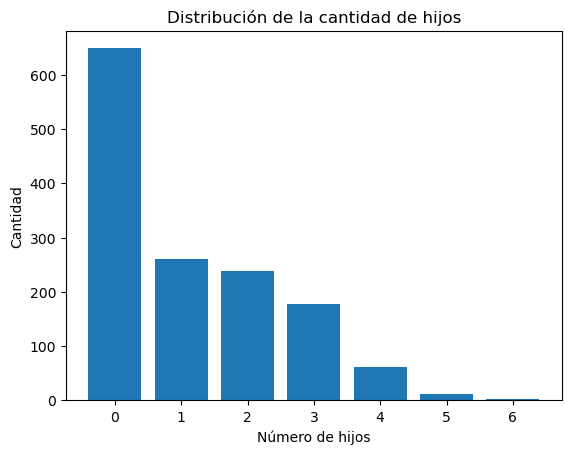

In [56]:
#Graficas de la cantidad de hijos
num_hijos = data_sucia['Hijos'].value_counts()
num_hijos = num_hijos.sort_index()
plt.bar(num_hijos.index,num_hijos.values)
plt.xlabel("Número de hijos")
plt.ylabel("Cantidad")
plt.title("Distribución de la cantidad de hijos")
plt.xticks(num_hijos.index)
plt.show()

## Gráfica Estado Civil

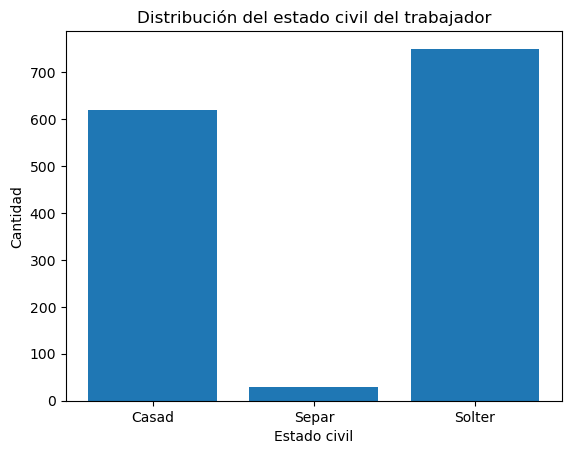

In [57]:
#Graficas del estado civil del trabajador
num_est_civil = data_sucia['Estado Civil'].value_counts()
num_est_civil = num_est_civil.sort_index()
plt.bar(num_est_civil.index,num_est_civil.values)
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")
plt.title("Distribución del estado civil del trabajador")
plt.show()

# Gráfica Motivo de RENUNCIA

In [58]:
data_sucia['Motivo de la RENUNCIA'].value_counts()

Vol-Otro empleo                     308
Vol-Transferencia entre planta      235
Vol-No regreso / no dio razón       218
Vol-Prob personales y/o fam.        197
Vol-Insatisfacción personal          94
Vol-Cambio de domicilio              89
Imp.Tra-Ausentismos continuos        71
Vol-Estudios                         68
Imp.Tra-Jubilación                   32
Vol-Razones médicas                  28
Imp.Tra-LFT y/o Reglamento Int.      12
Imp.Tra-LFT y/o Reglamento int       12
Imp.Pat-Pensionado IMSS               8
Imp.Pat-Terminación del Contrato      6
Imp.Tra-Bajo desempeño                3
Muerte Natural                        3
Vol-Maternidad                        3
Imp.Pat-Terminación del contra        2
Imp.Tra-Falsificación de docto        2
Imp.Tra-Falsificación de doctos.      2
Muerte Accidental                     2
Imp.Pat-Varios Jubilado               1
Imp.Tra-Uso de drogas y/o bebi        1
Vol-Ambiente de trabajo               1
Vol-Matrimonio                        1


# Renuncia (Guillermo)

Target = VOL = RENUNCIA
- Otro empleo
- Estudios
- NO regreso
- ...
- ...

## Comentario: 

Para el punto 4 del desafío, proponogo plotear una gráfica (podrían ser dos) que relacione el código póstal (podría ser ubicación actual) con el motivo de RENUNCIA Vol-Insatisfacción personal

----
** Area de Victor para creacion de base de datos **